# Lab 09 - Neural Net for XOR

X = A XOR B

### Truth Table

|A|B|X|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [1]:
import numpy as np
import tensorflow as tf

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.736033 [[ 1.0881927 ]
 [ 0.21432059]]
100 0.705444 [[ 0.60197049]
 [ 0.13209605]]
200 0.698211 [[ 0.37303045]
 [ 0.12148009]]
300 0.695295 [[ 0.2344107 ]
 [ 0.09993415]]
400 0.69408 [[ 0.14885609]
 [ 0.07699964]]
500 0.693559 [[ 0.09544519]
 [ 0.05705523]]
600 0.693331 [[ 0.06172917]
 [ 0.0412201 ]]
700 0.69323 [[ 0.04022428]
 [ 0.02926794]]
800 0.693184 [[ 0.02637969]
 [ 0.02052665]]
900 0.693164 [[ 0.01739368]
 [ 0.01426689]]
1000 0.693155 [[ 0.01152012]
 [ 0.00984977]]
1100 0.693151 [[ 0.00765814]
 [ 0.00676581]]
1200 0.693149 [[ 0.00510618]
 [ 0.00462949]]
1300 0.693148 [[ 0.00341296]
 [ 0.00315829]]
1400 0.693147 [[ 0.00228571]
 [ 0.00214967]]
1500 0.693147 [[ 0.00153321]
 [ 0.00146053]]
1600 0.693147 [[ 0.00102974]
 [ 0.00099093]]
1700 0.693147 [[ 0.0006923 ]
 [ 0.00067158]]
1800 0.693147 [[ 0.00046588]
 [ 0.00045481]]
1900 0.693147 [[ 0.00031366]
 [ 0.00030775]]
2000 0.693147 [[ 0.00021129]
 [ 0.00020813]]
2100 0.693147 [[ 0.00014238]
 [ 0.00014069]]
2200 0.693147 [[  9.5976

In [2]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 1.51578 [[-0.4632282 ]
 [ 1.42975867]]
100 0.697605 [[-0.4632282 ]
 [ 1.42975867]]
200 0.695338 [[-0.4632282 ]
 [ 1.42975867]]
300 0.693681 [[-0.4632282 ]
 [ 1.42975867]]
400 0.6922 [[-0.4632282 ]
 [ 1.42975867]]
500 0.690642 [[-0.4632282 ]
 [ 1.42975867]]
600 0.688766 [[-0.4632282 ]
 [ 1.42975867]]
700 0.686337 [[-0.4632282 ]
 [ 1.42975867]]
800 0.683114 [[-0.4632282 ]
 [ 1.42975867]]
900 0.678861 [[-0.4632282 ]
 [ 1.42975867]]
1000 0.673385 [[-0.4632282 ]
 [ 1.42975867]]
1100 0.666576 [[-0.4632282 ]
 [ 1.42975867]]
1200 0.658461 [[-0.4632282 ]
 [ 1.42975867]]
1300 0.649223 [[-0.4632282 ]
 [ 1.42975867]]
1400 0.63917 [[-0.4632282 ]
 [ 1.42975867]]
1500 0.628682 [[-0.4632282 ]
 [ 1.42975867]]
1600 0.618133 [[-0.4632282 ]
 [ 1.42975867]]
1700 0.607835 [[-0.4632282 ]
 [ 1.42975867]]
1800 0.598017 [[-0.4632282 ]
 [ 1.42975867]]
1900 0.588815 [[-0.4632282 ]
 [ 1.42975867]]
2000 0.580293 [[-0.4632282 ]
 [ 1.42975867]]
2100 0.572452 [[-0.4632282 ]
 [ 1.42975867]]
2200 0.565254 [[-0.4632282

## Wide NN for XOR

In [3]:
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.712986 [[ 1.45824015]
 [ 1.01299834]]
100 0.682549 [[ 1.45824015]
 [ 1.01299834]]
200 0.660738 [[ 1.45824015]
 [ 1.01299834]]
300 0.636572 [[ 1.45824015]
 [ 1.01299834]]
400 0.609601 [[ 1.45824015]
 [ 1.01299834]]
500 0.57937 [[ 1.45824015]
 [ 1.01299834]]
600 0.545608 [[ 1.45824015]
 [ 1.01299834]]
700 0.50846 [[ 1.45824015]
 [ 1.01299834]]
800 0.468523 [[ 1.45824015]
 [ 1.01299834]]
900 0.42678 [[ 1.45824015]
 [ 1.01299834]]
1000 0.384511 [[ 1.45824015]
 [ 1.01299834]]
1100 0.343104 [[ 1.45824015]
 [ 1.01299834]]
1200 0.303837 [[ 1.45824015]
 [ 1.01299834]]
1300 0.26768 [[ 1.45824015]
 [ 1.01299834]]
1400 0.235212 [[ 1.45824015]
 [ 1.01299834]]
1500 0.206625 [[ 1.45824015]
 [ 1.01299834]]
1600 0.181819 [[ 1.45824015]
 [ 1.01299834]]
1700 0.160501 [[ 1.45824015]
 [ 1.01299834]]
1800 0.142281 [[ 1.45824015]
 [ 1.01299834]]
1900 0.126745 [[ 1.45824015]
 [ 1.01299834]]
2000 0.113492 [[ 1.45824015]
 [ 1.01299834]]
2100 0.102164 [[ 1.45824015]
 [ 1.01299834]]
2200 0.0924477 [[ 1.458240

## Deep NN for XOR

In [4]:
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer1, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer1, W4) + b4)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 1.6784 [[-1.31091392]
 [-0.15802963]]
100 0.652196 [[-1.31091392]
 [-0.15802963]]
200 0.614466 [[-1.31091392]
 [-0.15802963]]
300 0.578765 [[-1.31091392]
 [-0.15802963]]
400 0.537564 [[-1.31091392]
 [-0.15802963]]
500 0.489576 [[-1.31091392]
 [-0.15802963]]
600 0.43622 [[-1.31091392]
 [-0.15802963]]
700 0.380569 [[-1.31091392]
 [-0.15802963]]
800 0.326358 [[-1.31091392]
 [-0.15802963]]
900 0.276815 [[-1.31091392]
 [-0.15802963]]
1000 0.23384 [[-1.31091392]
 [-0.15802963]]
1100 0.197901 [[-1.31091392]
 [-0.15802963]]
1200 0.168483 [[-1.31091392]
 [-0.15802963]]
1300 0.144627 [[-1.31091392]
 [-0.15802963]]
1400 0.125299 [[-1.31091392]
 [-0.15802963]]
1500 0.109575 [[-1.31091392]
 [-0.15802963]]
1600 0.0966914 [[-1.31091392]
 [-0.15802963]]
1700 0.086044 [[-1.31091392]
 [-0.15802963]]
1800 0.0771645 [[-1.31091392]
 [-0.15802963]]
1900 0.0696918 [[-1.31091392]
 [-0.15802963]]
2000 0.0633472 [[-1.31091392]
 [-0.15802963]]
2100 0.0579151 [[-1.31091392]
 [-0.15802963]]
2200 0.0532276 [[-1.3

# Deep and Wide NN for MNIST

In [1]:
import numpy, os, urllib, gzip, tempfile, random
import matplotlib.pyplot as plt


SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

VALIDATION_SIZE = 5000

def _read32(bytestream):
    dt = numpy.dtype(numpy.uint32).newbyteorder('>')
    return numpy.frombuffer(bytestream.read(4), dtype=dt)[0]

def download(filename, workdir):
    if not os.path.exists(workdir):
        os.mkdir(workdir)

    filepath = os.path.join(workdir, filename)

    print('Downloading', SOURCE_URL + filename)
    urllib.request.urlretrieve(SOURCE_URL + filename, filename=filepath)
    return filepath

def extract_images(filepath):
    print('Extracting', filepath)
    with gzip.open(filepath) as bytestream:
        magic = _read32(bytestream)
        if magic != 2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' % (magic, filepath))
        num_images = _read32(bytestream)
        rows = _read32(bytestream)
        cols = _read32(bytestream)
        buf = bytestream.read(rows * cols * num_images)
        data = numpy.frombuffer(buf, dtype=numpy.uint8)
        data = data.reshape(num_images, rows, cols, 1)

        # Reshape for NN
        data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
        data = data.astype(numpy.float32)
        data = numpy.multiply(data, 1. / 255.)
        return data

def extract_labels(filepath):
    print('Extracting', filepath)
    with gzip.open(filepath) as bytestream:
        magic = _read32(bytestream)
        if magic != 2049:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' % (magic, filepath))
        num_items = _read32(bytestream)
        buf = bytestream.read(num_items)
        labels = numpy.frombuffer(buf, dtype=numpy.uint8)

        num_labels = labels.shape[0]
        num_classes = 10    # 0..9
        index_offset = numpy.arange(num_labels) * num_classes
        labels_one_hot = numpy.zeros((num_labels, num_classes))
        labels_one_hot.flat[index_offset + labels.ravel()] = 1
        return labels_one_hot

workdir = tempfile.mkdtemp()
train_images = extract_images(download(TRAIN_IMAGES, workdir))
train_labels = extract_labels(download(TRAIN_LABELS, workdir))
test_images = extract_images(download(TEST_IMAGES, workdir))
test_labels = extract_labels(download(TEST_LABELS, workdir))
validation_images = train_images[:VALIDATION_SIZE]
validation_labels = train_labels[:VALIDATION_SIZE]
train_images = train_images[VALIDATION_SIZE:]
train_labels = train_labels[VALIDATION_SIZE:]

assert len(train_labels) == len(train_images)
assert len(validation_labels) == len(validation_images)
assert len(test_labels) == len(test_images)
num_train_data = len(train_labels)
num_validation_data = len(validation_labels)
num_test_data = len(test_labels)


Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpba5c3tr9/train-images-idx3-ubyte.gz
Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpba5c3tr9/train-labels-idx1-ubyte.gz
Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpba5c3tr9/t10k-images-idx3-ubyte.gz
Extracting /var/folders/3z/zvzt19xs7k955z3mjvlnm7sc0000gn/T/tmpba5c3tr9/t10k-labels-idx1-ubyte.gz


0 0.000482899221507 [-0.10385929  0.20777631 -0.03666057 -0.08564945  0.06119971  0.27314004
 -0.02336837  0.1588054  -0.39303887 -0.05834512]
1 0.000606882409616 [-0.15168154  0.25060719 -0.02410295 -0.12246495  0.06164464  0.47067532
 -0.03152192  0.25405145 -0.61781061 -0.08939652]
2 0.000512682362036 [-0.19422257  0.28007481 -0.00949639 -0.14747801  0.0607575   0.63442206
 -0.04458966  0.32911152 -0.79039341 -0.11818615]
3 0.000522675026547 [-0.2233156   0.29938978  0.0128879  -0.16836837  0.04704599  0.76719677
 -0.04813874  0.39060858 -0.93507081 -0.14223465]
4 0.000467216751792 [-0.25752303  0.31300867  0.02585722 -0.19390622  0.04685057  0.89024222
 -0.05925199  0.44629598 -1.04833686 -0.16323495]
Optimization finished!
Accuracy: 0.9218
Label: [3]
Prediction: [3]


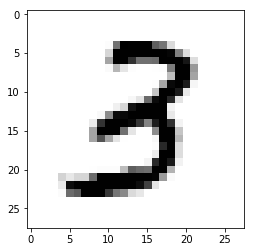

Label: [6]
Prediction: [6]


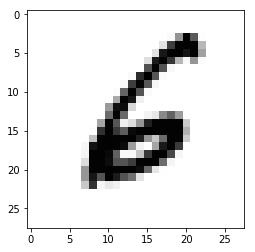

Label: [2]
Prediction: [2]


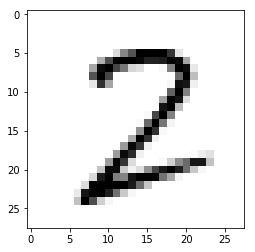

Label: [7]
Prediction: [7]


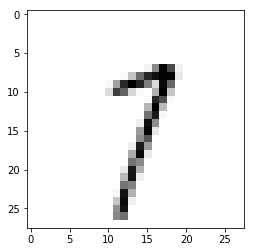

Label: [1]
Prediction: [6]


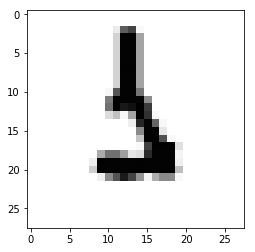

Label: [4]
Prediction: [4]


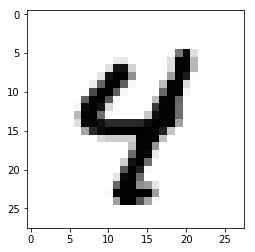

Label: [8]
Prediction: [8]


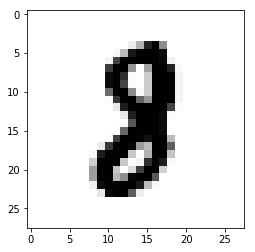

Label: [6]
Prediction: [6]


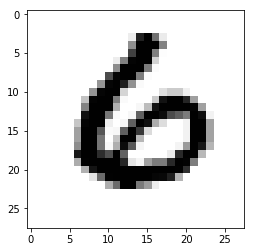

Label: [2]
Prediction: [8]


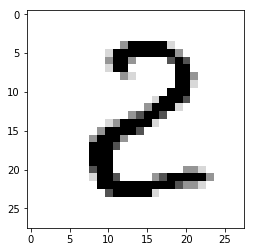

Label: [3]
Prediction: [3]


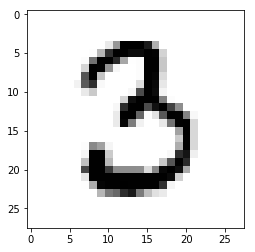

In [4]:
learning_rate = .1
training_epochs = 5
batch_size = 100

assert num_train_data % batch_size == 0

x = tf.placeholder(tf.float32, shape=[None, 784])    # image of shape 28 x 28 = 784
y = tf.placeholder(tf.float32, shape=[None, 10])     # 0..9 digits

W = tf.Variable(tf.zeros([784, 10]), name='weight')
b = tf.Variable(tf.zeros([10]), name='bias')
activation = tf.nn.softmax(tf.matmul(x, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices=1))

# activation = tf.sigmoid(tf.matmul(x, W) + b)
# cost = -tf.reduce_mean(y * tf.log(activation) + (1 - y) * tf.log(1 - activation))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):

        # Shuffle for each epoch
        perm = numpy.arange(num_train_data)
        numpy.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels = train_labels[perm]

        average_cost = .0
        total_batch = int(num_train_data / batch_size)
        for i in range(total_batch):
            batch_xs = train_images[i*batch_size:(i+1)*batch_size]
            batch_ys = train_labels[i*batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict={x: batch_xs, y:batch_ys})

        average_cost += sess.run(cost, feed_dict={x: batch_xs, y:batch_ys}) / total_batch
        print(epoch, average_cost, sess.run(b))

    print('Optimization finished!')

    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print('Accuracy:', accuracy.eval({x: validation_images, y: validation_labels}))

    for _ in range(10):
        # Get one and predict
        r = random.randint(0, num_test_data-1)
        print('Label:', sess.run(tf.argmax(test_labels[r:r+1], 1)))
        print('Prediction:', sess.run(tf.argmax(activation, 1), {x: test_images[r:r+1]}))

        # Show the image
        plt.imshow(test_images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()


0 0.00417147896507 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1 0.00417898871682 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2 0.00416785500266 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3 0.00418519323522 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
4 0.00417614026503 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Optimization finished!
Accuracy: 0.1126
Label: [7]
Prediction: [1]


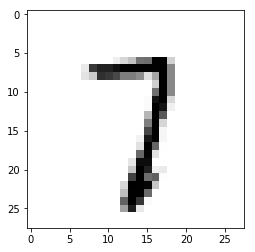

Label: [5]
Prediction: [1]


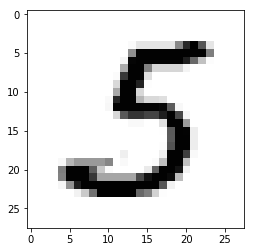

Label: [9]
Prediction: [1]


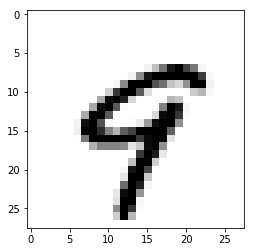

Label: [6]
Prediction: [1]


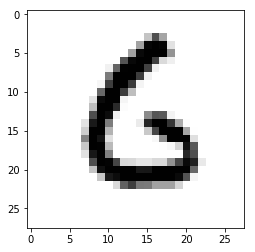

Label: [0]
Prediction: [1]


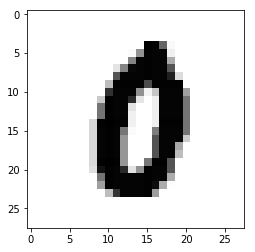

Label: [0]
Prediction: [1]


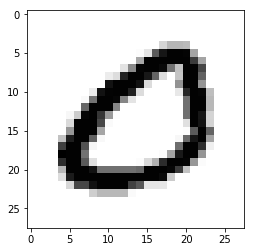

Label: [6]
Prediction: [1]


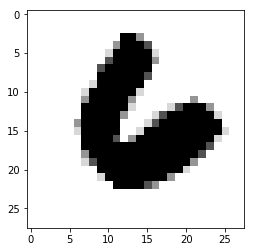

Label: [6]
Prediction: [1]


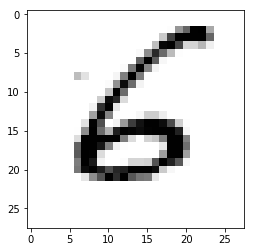

Label: [1]
Prediction: [1]


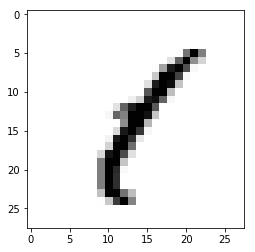

Label: [8]
Prediction: [1]


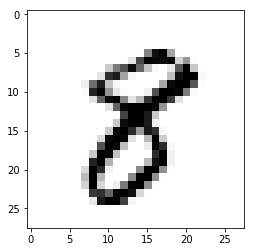

In [6]:
learning_rate = .1
training_epochs = 5
batch_size = 100

assert num_train_data % batch_size == 0

x = tf.placeholder(tf.float32, shape=[None, 784])    # image of shape 28 x 28 = 784
y = tf.placeholder(tf.float32, shape=[None, 10])     # 0..9 digits

W1 = tf.Variable(tf.zeros([784, 128]), name='weight1')
b1 = tf.Variable(tf.zeros([128]), name='bias1')
layer1 = tf.nn.softmax(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.zeros([128, 32]), name='weight2')
b2 = tf.Variable(tf.zeros([32]), name='bias2')
layer2 = tf.nn.softmax(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.zeros([32, 16]), name='weight3')
b3 = tf.Variable(tf.zeros([16]), name='bias3')
layer3 = tf.nn.softmax(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.zeros([16, 10]), name='weight4')
b4 = tf.Variable(tf.zeros([10]), name='bias4')
activation = tf.nn.softmax(tf.matmul(layer3, W4) + b4)

cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices=1))

# W = tf.Variable(tf.zeros([784, 10]), name='weight')
# b = tf.Variable(tf.zeros([10]), name='bias')
# activation = tf.nn.softmax(tf.matmul(x, W) + b)
# cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices=1))

# activation = tf.sigmoid(tf.matmul(x, W) + b)
# cost = -tf.reduce_mean(y * tf.log(activation) + (1 - y) * tf.log(1 - activation))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):

        # Shuffle for each epoch
        perm = numpy.arange(num_train_data)
        numpy.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels = train_labels[perm]

        average_cost = .0
        total_batch = int(num_train_data / batch_size)
        for i in range(total_batch):
            batch_xs = train_images[i*batch_size:(i+1)*batch_size]
            batch_ys = train_labels[i*batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict={x: batch_xs, y:batch_ys})

        average_cost += sess.run(cost, feed_dict={x: batch_xs, y:batch_ys}) / total_batch
        print(epoch, average_cost, sess.run(b))

    print('Optimization finished!')

    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print('Accuracy:', accuracy.eval({x: validation_images, y: validation_labels}))

    for _ in range(10):
        # Get one and predict
        r = random.randint(0, num_test_data-1)
        print('Label:', sess.run(tf.argmax(test_labels[r:r+1], 1)))
        print('Prediction:', sess.run(tf.argmax(activation, 1), {x: test_images[r:r+1]}))

        # Show the image
        plt.imshow(test_images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()


# How to use TensorBoard

1. Decide which tensors you want to log: `tf.summary.histogram()`, `tf.summary.scalar()`
2. Merge all summaries: `tf.summary.merge_all()`
3. Create a writer and add graph: `tf.summary.FileWriter` and `writer.add_graph()`
4. Run summary merge and add_summary: `sess.run([summary, optimizer])` and `writer.add_summary()`
5. Launch tensorboard: `$ tensorboard --logdir=./logs`

In [1]:
import numpy as np
import tensorflow as tf

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope('layer1') as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    
    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)

with tf.name_scope('layer2') as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

with tf.name_scope('train') as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    
    cost_summ = tf.summary.scalar("cost", cost)
    
    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# accuracy_scal = tf.summary.scalar("accuracy", accuracy)


with tf.Session() as sess:
    summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter('/tmp/tf-lap09.log')
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        s, _ = sess.run([summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(s, step)
        
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
        
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 1.16291 [array([[ 1.05332768, -0.18944852],
       [-0.32260624,  1.01932907]], dtype=float32), array([[-0.99032283],
       [ 1.04051268]], dtype=float32)]
100 0.69656 [array([[ 1.17815161, -0.29443818],
       [-0.20627974,  0.88901818]], dtype=float32), array([[-1.6461252 ],
       [ 0.47223869]], dtype=float32)]
200 0.694626 [array([[ 1.1566993 , -0.29720777],
       [-0.29037833,  0.8742097 ]], dtype=float32), array([[-1.61200762],
       [ 0.4344916 ]], dtype=float32)]
300 0.692955 [array([[ 1.15390968, -0.30093014],
       [-0.37150493,  0.86114466]], dtype=float32), array([[-1.57408178],
       [ 0.40624741]], dtype=float32)]
400 0.691261 [array([[ 1.17027199, -0.30580726],
       [-0.45175534,  0.84886205]], dtype=float32), array([[-1.54254413],
       [ 0.38048995]], dtype=float32)]
500 0.689409 [array([[ 1.20460713, -0.31136167],
       [-0.53495979,  0.8373124 ]], dtype=float32), array([[-1.51820135],
       [ 0.35663748]], dtype=float32)]
600 0.687292 [array([[ 1.2559660

5100 0.124863 [array([[ 5.96295261, -4.13252497],
       [-5.9491601 ,  4.56565475]], dtype=float32), array([[-5.22759628],
       [-5.21876764]], dtype=float32)]
5200 0.117938 [array([[ 6.00622988, -4.22361135],
       [-5.9913168 ,  4.64937353]], dtype=float32), array([[-5.32316303],
       [-5.33299112]], dtype=float32)]
5300 0.111678 [array([[ 6.04763222, -4.30858421],
       [-6.03109884,  4.72781706]], dtype=float32), array([[-5.41593599],
       [-5.44116402]], dtype=float32)]
5400 0.105999 [array([[ 6.08726835, -4.38809252],
       [-6.06873846,  4.80149794]], dtype=float32), array([[-5.5059123 ],
       [-5.54388666]], dtype=float32)]
5500 0.100826 [array([[ 6.12525034, -4.46269226],
       [-6.10444069,  4.87086821]], dtype=float32), array([[-5.59312582],
       [-5.64167833]], dtype=float32)]
5600 0.0960995 [array([[ 6.16167259, -4.53287697],
       [-6.13838053,  4.93632746]], dtype=float32), array([[-5.67763805],
       [-5.73498631]], dtype=float32)]
5700 0.091766 [array(